In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Verbi mallidega mittesobituvate transaktsioonide apriori

**Esimene katsetus**

Voog:
1. paneb patterns tabeli põhjal kokku verbide nimekirja, iga verbi juurde salvestab temma mallide id-d (pat_id)
   * verb on: verb + verb_compound
2. itereerib üle verbide [praeguses versioonis 10 juhuslikku]
   * laeb tabelist verb_matches kõik transaktsioonide id-d, kus verb esines (pat_id järgi)
   * laeb tabelist verb_phrase_matches kõik transaktsioonide id-d, mis sobitusid verbi mallidega
   * leiab verbi transaktsioonide id-d, millele ei sobinud ükski mall
   * analüüsib leitud transaktsioonid apriori algoritmiga (kasutab sqlite ajutise tabeli loomist)
  

In [27]:
#!pip install seaborn sqlalchemy mlxtend tqdm

import sqlite3
import sys
import os
from pathlib import Path
from tqdm import tqdm

from helpers import *
# Get the current working directory and path of the current script
current_directory = os.getcwd()
ROOT = str(Path(current_directory).parent.parent)
sys.path.append(f"{ROOT}/apriori/v33")
from V33Apriori import V33, Transaction, TransactionHead

PATH_TRANSACTIONS_DB = (
    ROOT
    + "/verb_transactions/v33/v33_koondkorpus_sentences_verb_pattern_obl_20241002-130310.db"
)

PATH_PATTERNS_DB = (
    ROOT + "/verb_patterns/v32/vp_data2.db"
)

def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d

In [28]:

# VERBIDE MALLIDE andmebaas

con = sqlite3.connect(PATH_PATTERNS_DB)
con.row_factory = dict_factory
cur = con.cursor()


In [29]:

# Loeme sisse kõik mallid verbide kaupa
# loeme verbi samaks, kui on sama verb_word+verb_compound 

verbs = cur.execute("""
    SELECT 
        verb_word,
        verb_compound,
        GROUP_CONCAT(pat_id) as pat_ids
    FROM patterns group by verb_word, verb_compound
    ORDER BY verb_word, verb_compound, pat_id
    """
).fetchall()

for v in verbs:
    v['pat_ids'] = v['pat_ids'].split(',')

print(f'Baasis kokku: {len(verbs)} verbi')

Baasis kokku: 1271 verbi


  0%|          | 0/10 [00:00<?, ?it/s]



####################################################
			136		 harjutama 
{'pat_id': 270, 'pattern': 'harjutama mida*', 'verb_word': 'harjutama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 3844 transaktsiooni.
3844 !=  3729 tähendab, et osa transaktsioone on tühjad.
Ridu analüüsimiseks: 3729
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
4,0.565299,"[(NSUBJ, nom, , )]",kes,poisiklutt,lazutina,False,,1
1,0.482971,"[(ADVMOD, , , )]",veidike,põhiliselt,kergemalt,False,,1
6,0.272995,"[(OBL, in, , )]",kodulinnas,bulgaarias,jaanuaris,False,,1
9,0.259587,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",esindajad kaua,kümnevõistlejad küll,sa mismoodi,False,,2
5,0.216948,"[(OBL, ad, , )]",suvel,nädalavahetusel,pirital,False,,1
13,0.165192,"[(NSUBJ, nom, , ), (OBL, in, , )]",boržakovski metsas,liider stavangeris,klavan rühmas,False,,2
12,0.125235,"[(NSUBJ, nom, , ), (OBL, ad, , )]",derby inglismaal,ta kohtla-järvel,agassi ajal,False,,2
2,0.094127,"[(AUX, , , )]",olen,pole,olen,False,,1
7,0.094127,"[(OBL, kom, , )]",palliga,esindusega,jõuga,False,,1
11,0.091177,"[(OBL, in, , ), (ADVMOD, , , )]",peas põhiliselt,kodus kas,laagris praegu,False,,2


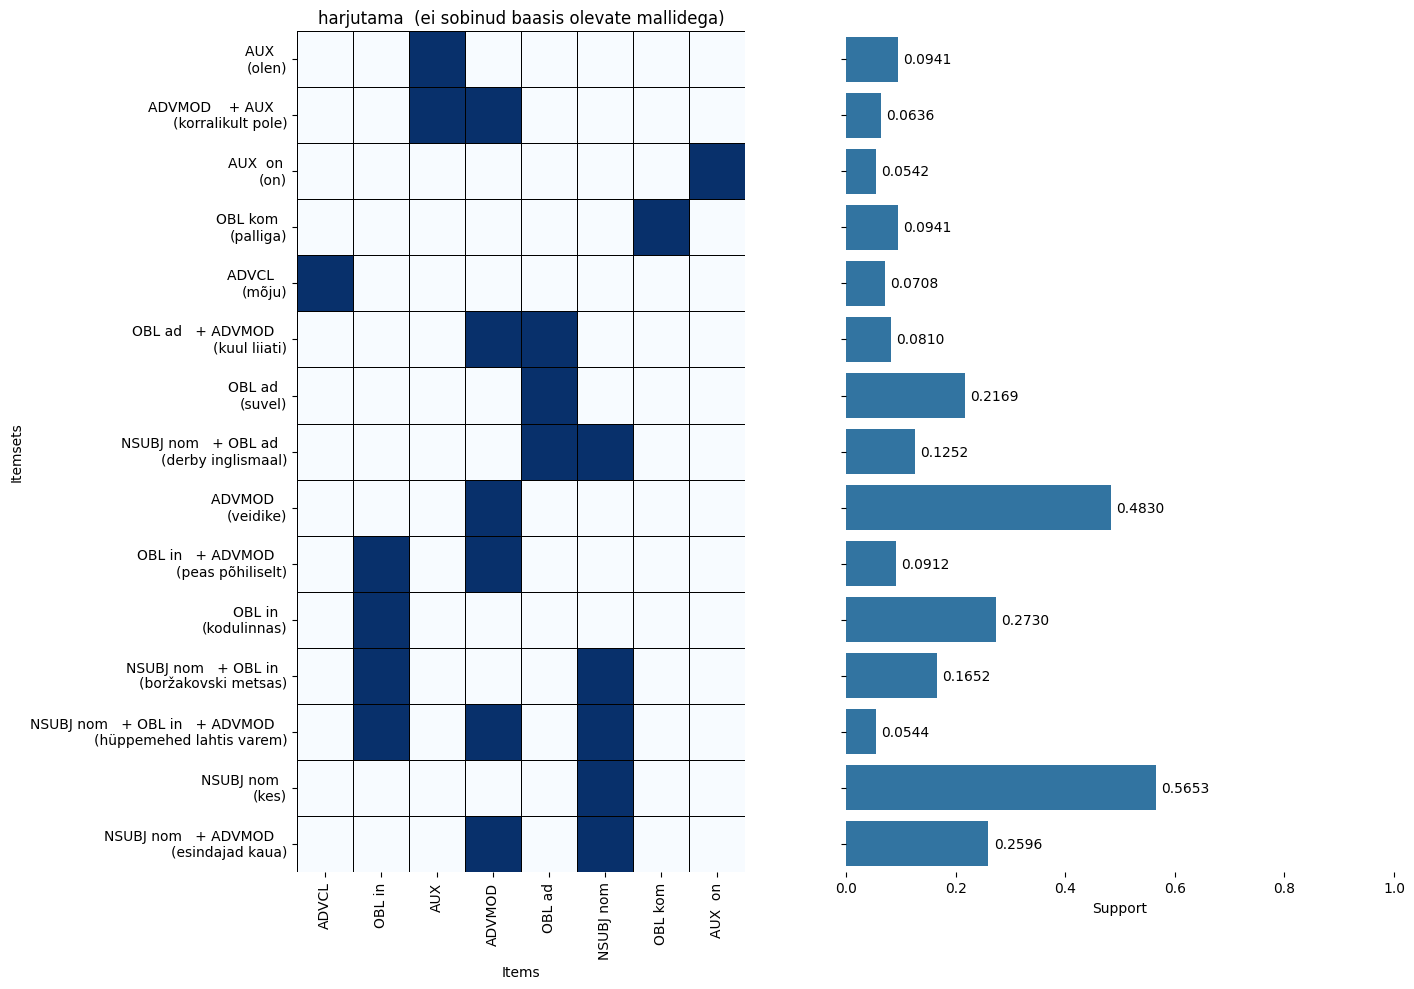

 10%|█         | 1/10 [00:21<03:11, 21.22s/it]



####################################################
			795		 puhkama 
{'pat_id': 1481, 'pattern': 'puhkama kellest/millest', 'verb_word': 'puhkama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'el', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 4731 transaktsiooni.
4731 !=  4182 tähendab, et osa transaktsioone on tühjad.
Ridu analüüsimiseks: 4182
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
2,0.582018,"[(NSUBJ, nom, , )]",rootslased,inimesed,ministeerium,False,,1
1,0.430655,"[(ADVMOD, , , )]",mullu,veidi,seal,False,,1
4,0.235533,"[(OBL, in, , )]",jaapanis,ühendriikides,usas,False,,1
6,0.232903,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",omanik praegu,kristjan teisal,tsaarid muide,False,,2
3,0.197752,"[(OBL, ad, , )]",sõnul,ajal,sõnul,False,,1
10,0.134146,"[(NSUBJ, nom, , ), (OBL, in, , )]",tekiluugid kroonlinnas,ta rahus,luud-kondid kuressaares,False,,2
9,0.124342,"[(NSUBJ, nom, , ), (OBL, ad, , )]",noored sõnul,me suvel,inimesed suvel,False,,2
5,0.081779,"[(OBL, part, , )]",päeva,päeva,korda,False,,1
0,0.081301,"[(ADVCL, , , )]",ajanud,lugedes,mängides,False,,1
8,0.069345,"[(OBL, in, , ), (ADVMOD, , , )]",aastas vähem,hispaanias praegu,seinas aga,False,,2


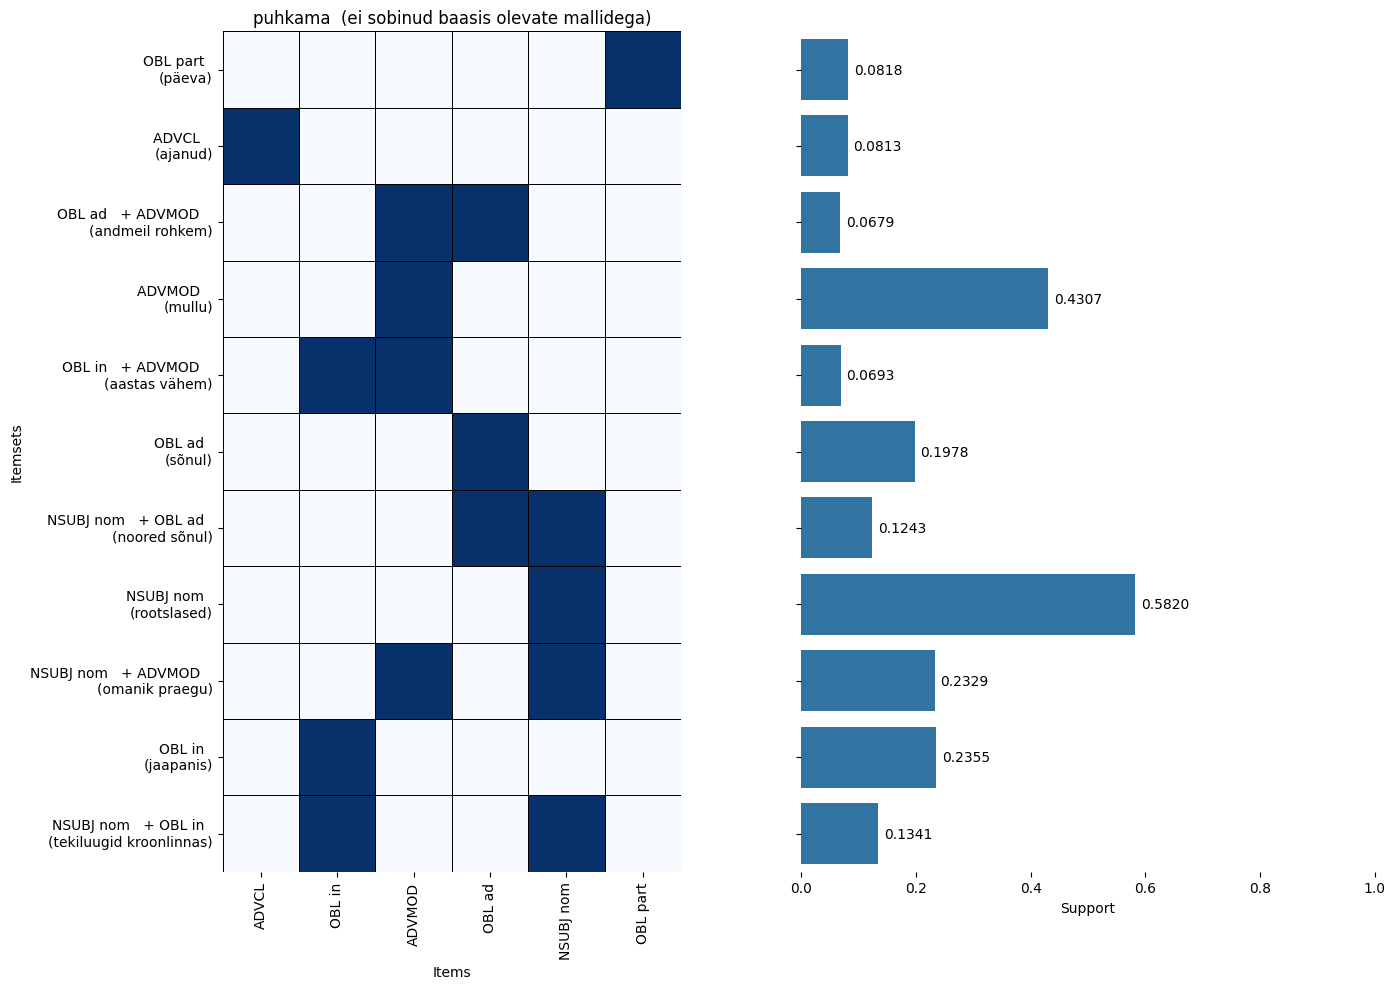

 20%|██        | 2/10 [00:41<02:46, 20.85s/it]



####################################################
			118		 haakuma 
{'pat_id': 231, 'pattern': 'haakuma millega', 'verb_word': 'haakuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'kom', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 546 transaktsiooni.
546 !=  537 tähendab, et osa transaktsioone on tühjad.
Ridu analüüsimiseks: 537
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.778399,"[(NSUBJ, nom, , )]",teine,huvi,need,False,,1
1,0.554935,"[(ADVMOD, , , )]",suurepäraselt,kas,erinevalt,False,,1
11,0.435754,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",silmapaarid hoobilt,kummisegu nii,mudelid tihtipeale,False,,2
2,0.234637,"[(AUX, , ei, )]",ei,ei,ei,False,,1
13,0.176909,"[(NSUBJ, nom, , ), (AUX, , ei, )]",skandaalid ei,teemad ei,pädevus ei,False,,2
10,0.156425,"[(ADVMOD, , , ), (AUX, , ei, )]",hästi ei,enam ei,sujuvalt ei,False,,2
6,0.132216,"[(OBL, gen, , )]",ühisnäituse,põhiseaduse,mere-,True,(row 15) delta: abs(0.1173 - 0.1322) < 0.03 %:...,1
15,0.117318,"[(NSUBJ, nom, , ), (OBL, gen, , )]",mis näitlejategevuse,laulud probleemide,see olemuse,False,,2
16,0.117318,"[(NSUBJ, nom, , ), (ADVMOD, , , ), (AUX, , ei, )]",argumendid just ei,sõna sugugi ei,asi nii ei,False,,3
0,0.074488,"[(ADVCL, , , )]",reklaamiks,võttes,viia,True,(row 9) delta: abs(0.0596 - 0.0745) < 0.03 %: ...,1


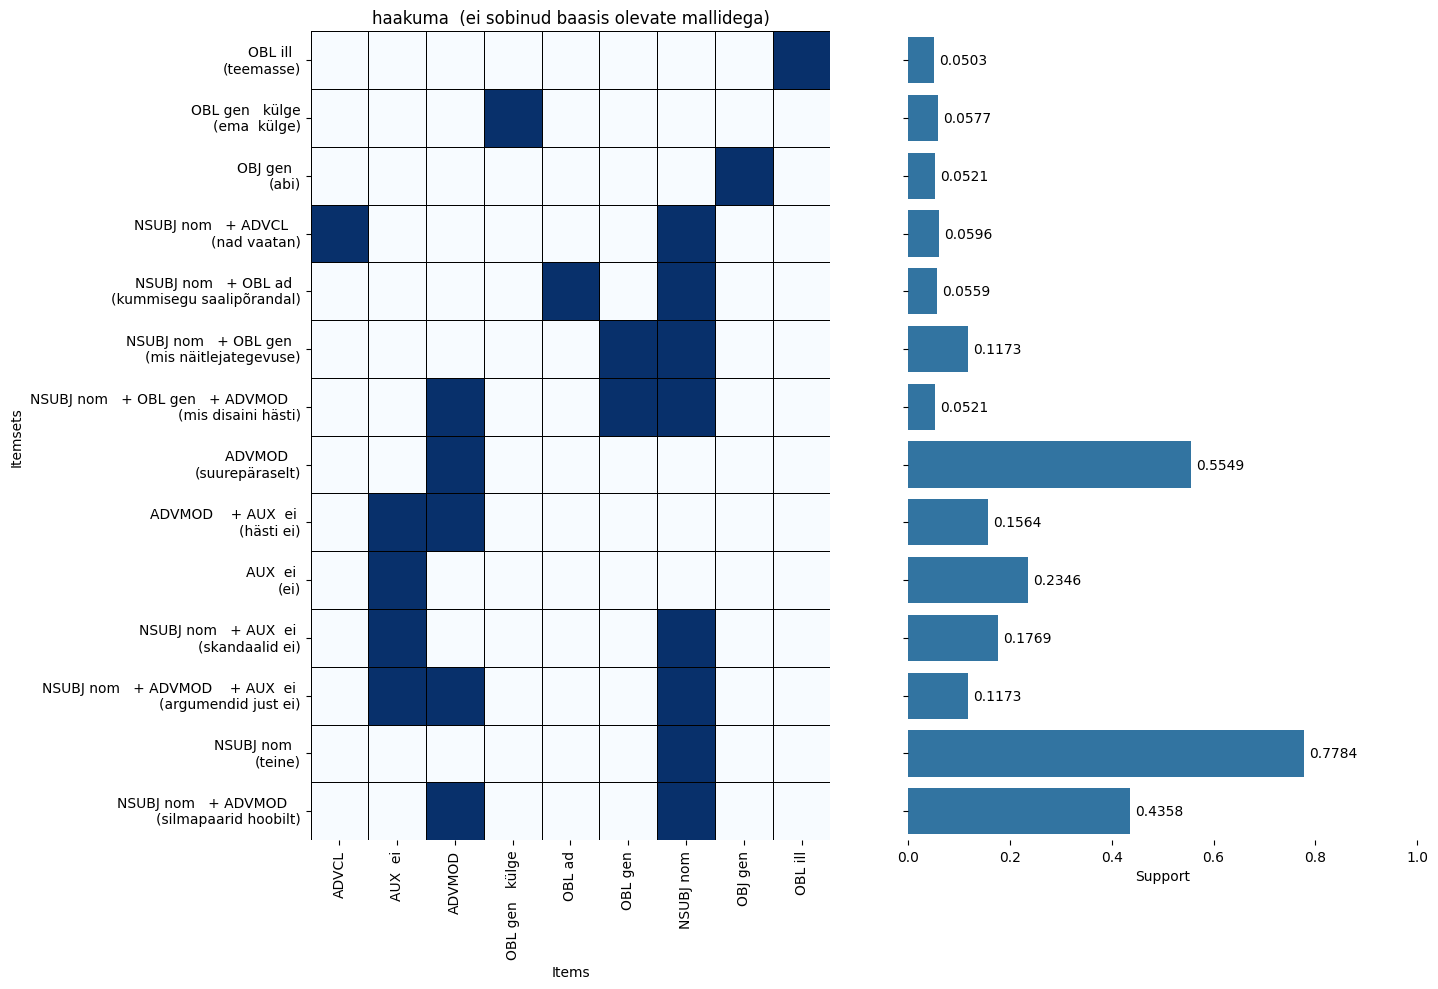

 30%|███       | 3/10 [00:47<01:38, 14.11s/it]



####################################################
			677		 nägema pealt
{'pat_id': 1399, 'pattern': 'pealt nägema mida*', 'verb_word': 'nägema', 'verb_compound': 'pealt', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 180 transaktsiooni.
180 !=  173 tähendab, et osa transaktsioone on tühjad.
Ridu analüüsimiseks: 173
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
5,0.664740,"[(NSUBJ, nom, , )]",tuttav,eric,hiigeltulekahju,False,,1
4,0.508671,"[(CCOMP, , , )]",tegid,leiavad,virutas,False,,1
14,0.335260,"[(NSUBJ, nom, , ), (CCOMP, , , )]",registraator väänas,leonid röövis,väikemees sõid,False,,2
1,0.231214,"[(ADVMOD, , , )]",ju,lähedalt,tegelikult,False,,1
13,0.127168,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",ma isiklikult,biyoke kunagi,tuttav kord,False,,2
7,0.109827,"[(OBJ, nom, , )]",sündmust,kuritööd,sündmust,True,(row 15) delta: abs(0.0925 - 0.1098) < 0.03 %:...,1
0,0.104046,"[(ADVCL, , , )]",rebis,mõrvatakse,andis,True,(row 11) delta: abs(0.0751 - 0.1040) < 0.03 %:...,1
12,0.098266,"[(CCOMP, , , ), (ADVMOD, , , )]",kõndis täna,ajas kord,ajas kord,True,(row 17) delta: abs(0.0694 - 0.0983) < 0.03 %:...,2
15,0.092486,"[(NSUBJ, nom, , ), (OBJ, nom, , )]",ludmilla peksmist,juht sündmust,hiigeltulekahju inimesed,False,,2
11,0.075145,"[(NSUBJ, nom, , ), (ADVCL, , , )]",ma tea,keegi arvates,hunt rautati,False,,2


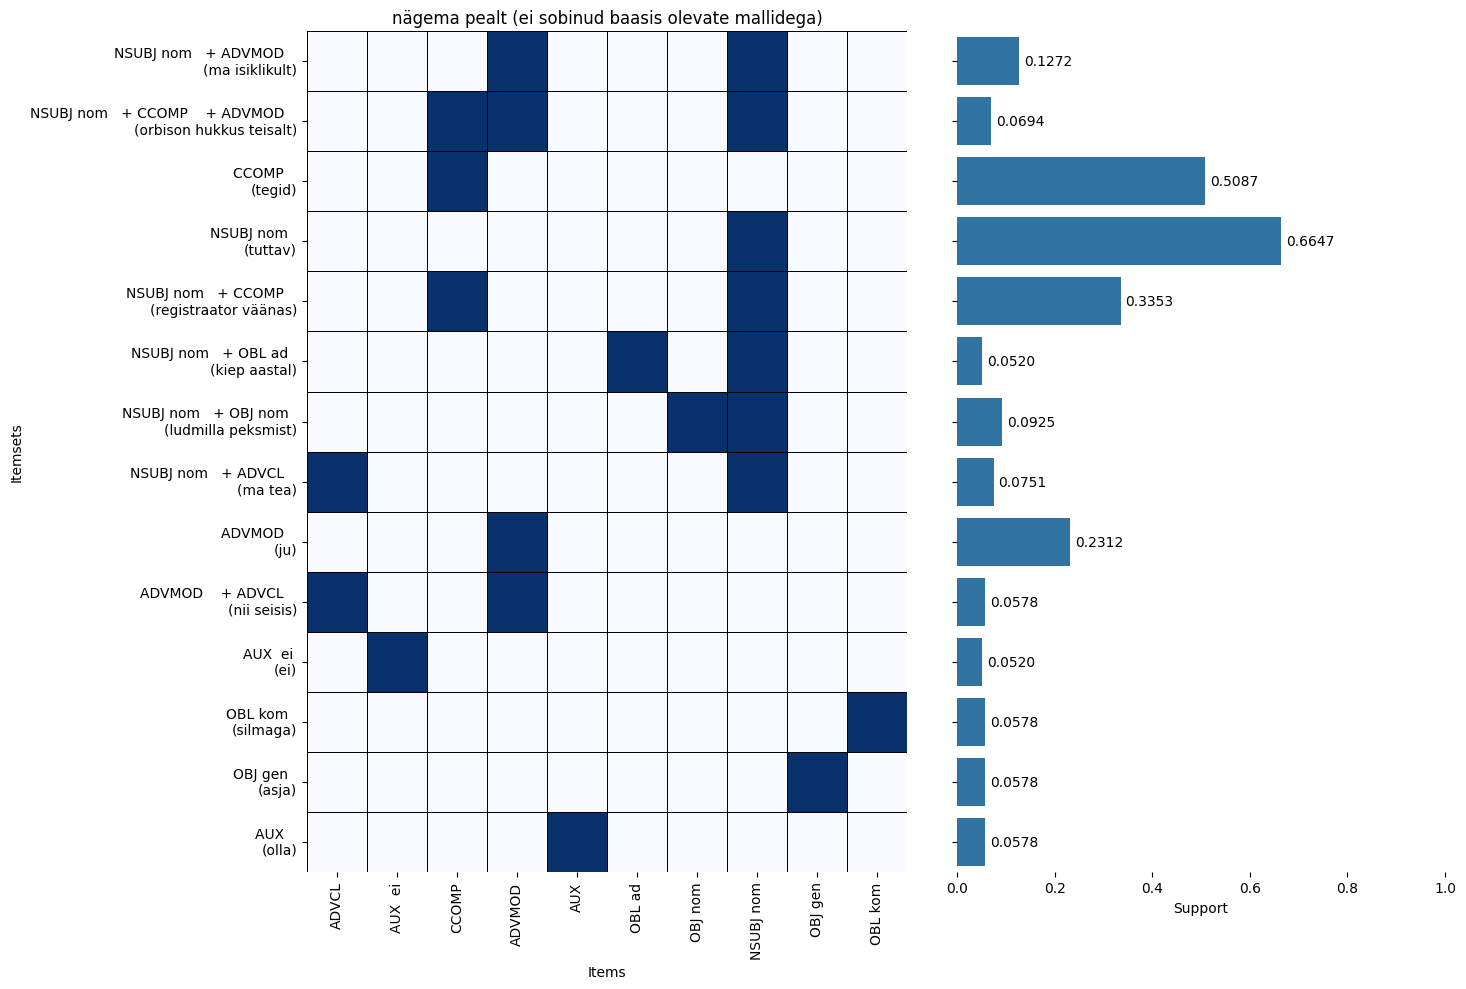

 40%|████      | 4/10 [00:53<01:04, 10.68s/it]



####################################################
			132		 hammustama 
{'pat_id': 266, 'pattern': 'hammustama keda*', 'verb_word': 'hammustama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'part', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 919 transaktsiooni.
919 !=  828 tähendab, et osa transaktsioone on tühjad.
Ridu analüüsimiseks: 828
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
4,0.658213,"[(NSUBJ, nom, , )]",ta,tema,puuk,False,,1
1,0.335749,"[(ADVMOD, , , )]",isegi,siis,väidetavalt,False,,1
11,0.207729,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",hinnad ka,milton nüüd,hinnad aga,False,,2
6,0.195652,"[(OBJ, gen, , )]",tüki,käe,baleriini,False,,1
3,0.194444,"[(AUX, , ei, )]",ei,ei,ei,False,,1
9,0.165459,"[(OBL, el, , )]",fondidest,jalast,otsast,False,,1
12,0.164251,"[(NSUBJ, nom, , ), (AUX, , ei, )]",küsitleja ei,ta ei,ta ei,False,,2
13,0.114734,"[(NSUBJ, nom, , ), (OBJ, gen, , )]",tyson tüki,lõvi pöidla,kavaler nina,False,,2
15,0.096618,"[(NSUBJ, nom, , ), (OBL, el, , )]",evander kõrvast,tartu jalast,ahv tagumikust,False,,2
7,0.085749,"[(OBL, ad, , )]",pühapäeval,pressikonverentsil,tal,False,,1


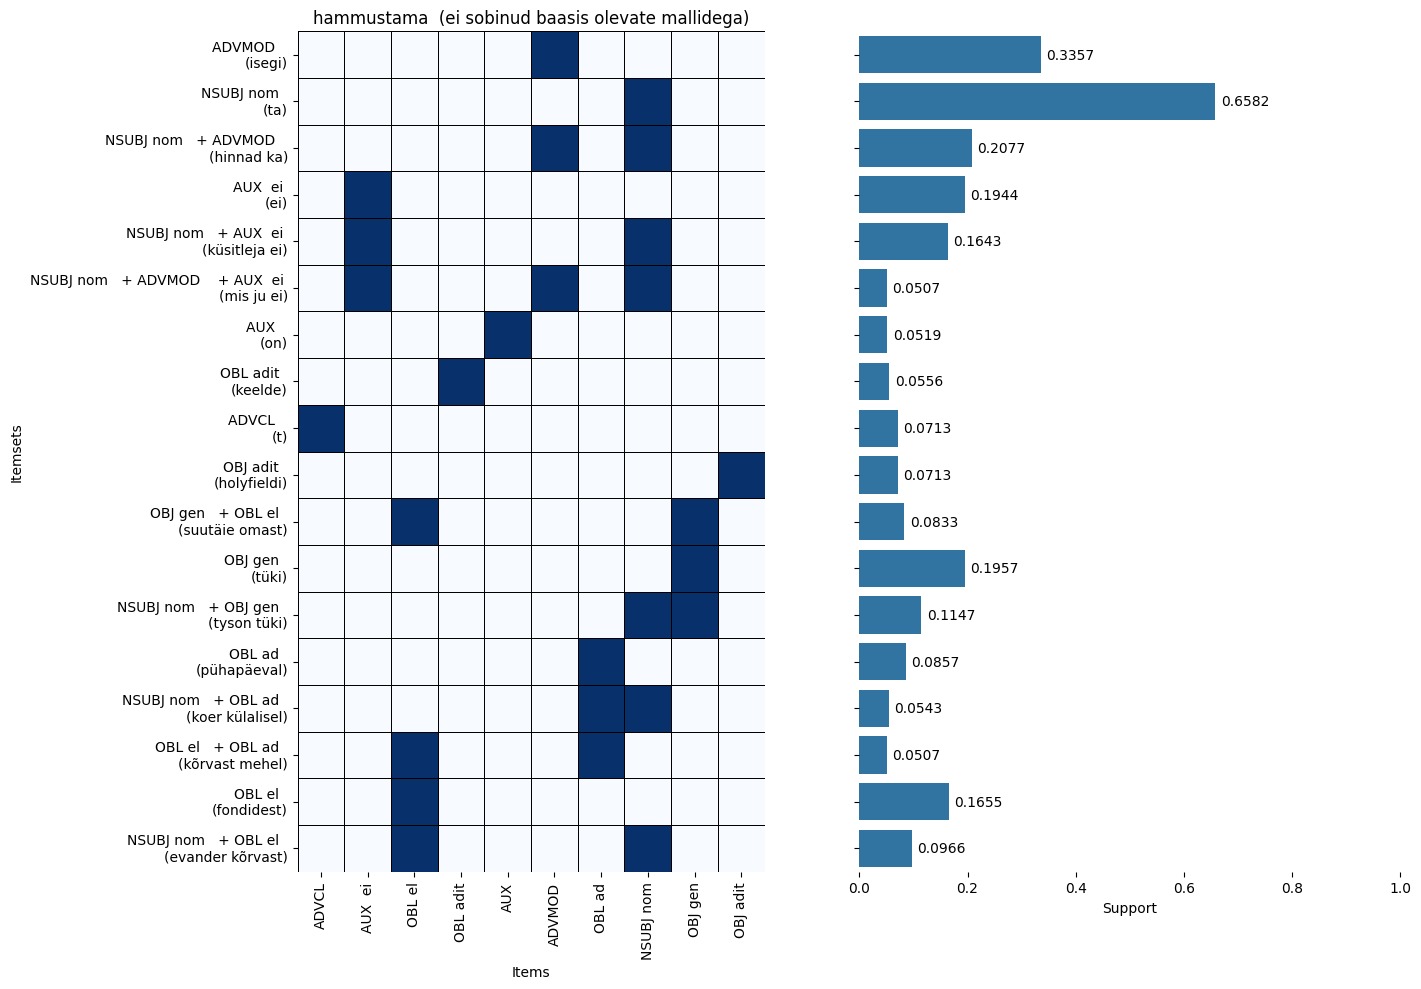

 50%|█████     | 5/10 [00:59<00:45,  9.16s/it]



####################################################
			332		 kanduma 
{'pat_id': 549, 'pattern': 'kanduma kuhu', 'verb_word': 'kanduma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'all', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 1431 transaktsiooni.
1431 !=  1427 tähendab, et osa transaktsioone on tühjad.
Ridu analüüsimiseks: 1427
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.791170,"[(NSUBJ, nom, , )]",mälutorm,peatus,valimised,False,,1
1,0.370007,"[(ADVMOD, , , )]",praegu,ilmekalt,aeglaselt,False,,1
13,0.302032,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",teema hiljem,kõrbelõhn ikkagi,ilja teistkordselt,False,,2
9,0.188507,"[(OBL, ill, , )]",valimisringkondadesse,lehtedesse,restoranidesse,False,,1
21,0.154870,"[(NSUBJ, nom, , ), (OBL, ill, , )]",põhirõhk tartusse,eufooria linnadesse,mäng karistusalasse,False,,2
6,0.121233,"[(OBL, adit, , )]",selga,randa,kontserdimajja,False,,1
7,0.110722,"[(OBL, el, , )]",perifeeriast,lõunast,suust,False,,1
11,0.102313,"[(OBL, term, , )]",kodanikeni,17.35-ni,meetrini,True,(row 22) delta: abs(0.0862 - 0.1023) < 0.03 %:...,1
5,0.096706,"[(OBL, ad, , )]",nädalal,sõnul,soojendusel,True,(row 17) delta: abs(0.0757 - 0.0967) < 0.03 %:...,1
18,0.088998,"[(NSUBJ, nom, , ), (OBL, adit, , )]",mis pähe,kumu lätti,raskuspunkt linna,False,,2


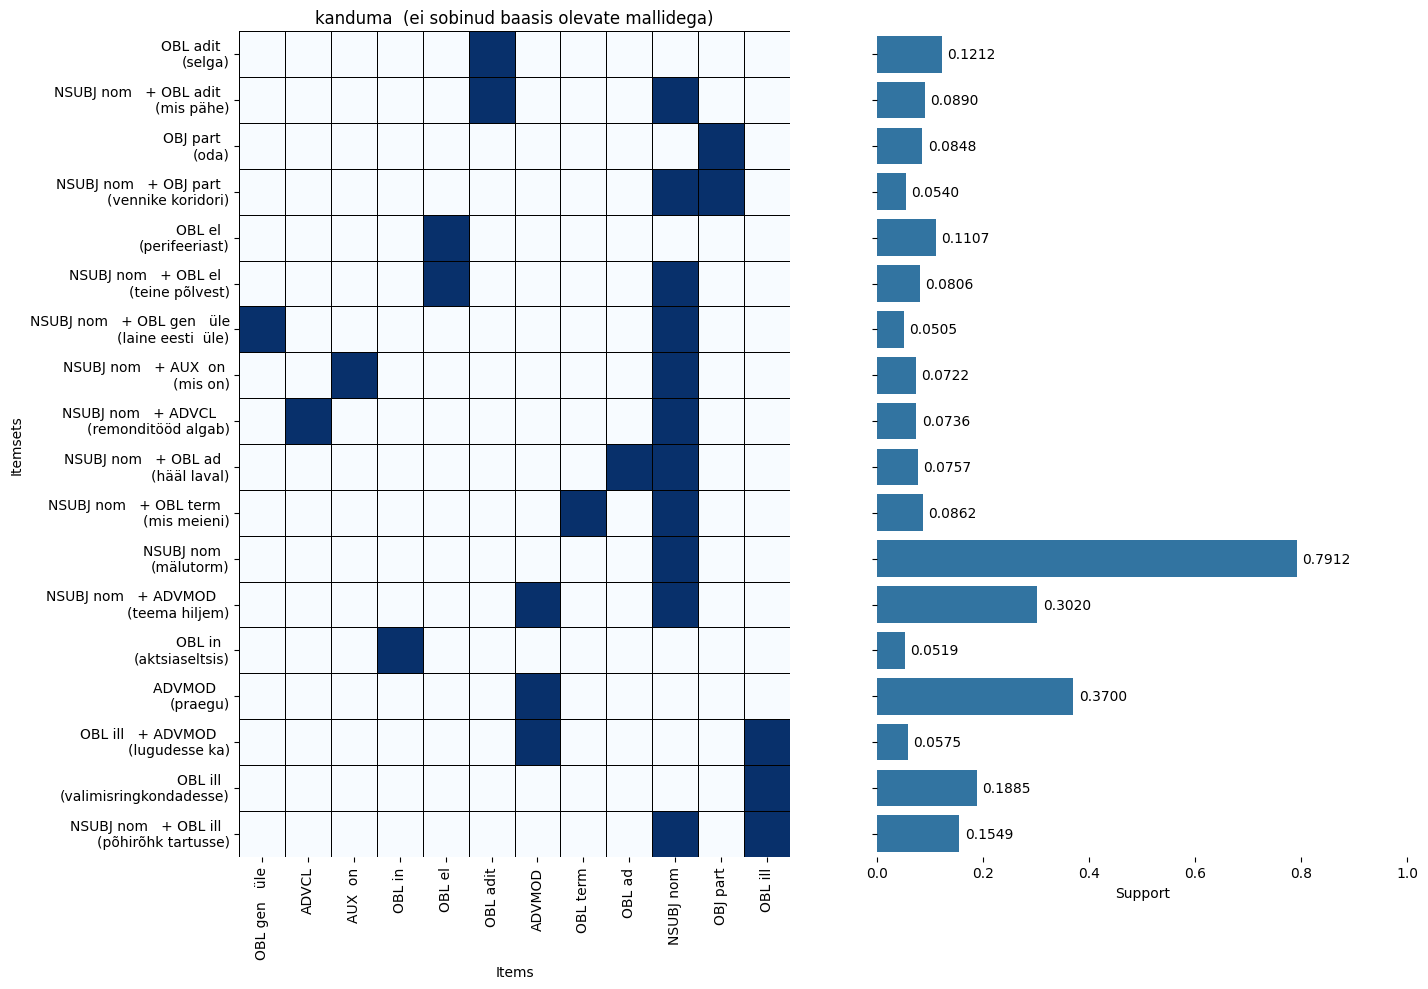

 60%|██████    | 6/10 [01:20<00:52, 13.19s/it]



####################################################
			77		 ebaõnnestuma 
{'pat_id': 134, 'pattern': 'ebaõnnestuma kellel', 'verb_word': 'ebaõnnestuma', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'ad', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 4339 transaktsiooni.
4339 !=  2862 tähendab, et osa transaktsioone on tühjad.
Ridu analüüsimiseks: 2862
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.771488,"[(NSUBJ, nom, , )]",start,välireklaamifirma,tapjad,False,,1
1,0.327044,"[(ADVMOD, , , )]",toona,samuti,natuke,False,,1
6,0.229210,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",rahnul siis,kolimine täielikult,hooaeg täielikult,False,,2
2,0.094340,"[(AUX, , on, )]",on,on,on,True,(row 7) delta: abs(0.0853 - 0.0943) < 0.03 %: ...,1
7,0.085255,"[(NSUBJ, nom, , ), (AUX, , on, )]",see on,raketis on,palkamine on,False,,2
0,0.076520,"[(ADVCL, , , )]",läks,proovinud,püüti,True,(row 5) delta: abs(0.0702 - 0.0765) < 0.03 %: ...,1
5,0.070231,"[(NSUBJ, nom, , ), (ADVCL, , , )]",konkurss ületasid,tapatöö jõudis,start seiskus,False,,2
4,0.069532,"[(OBL, in, , )]",mängus,septembris,eestis,False,,1


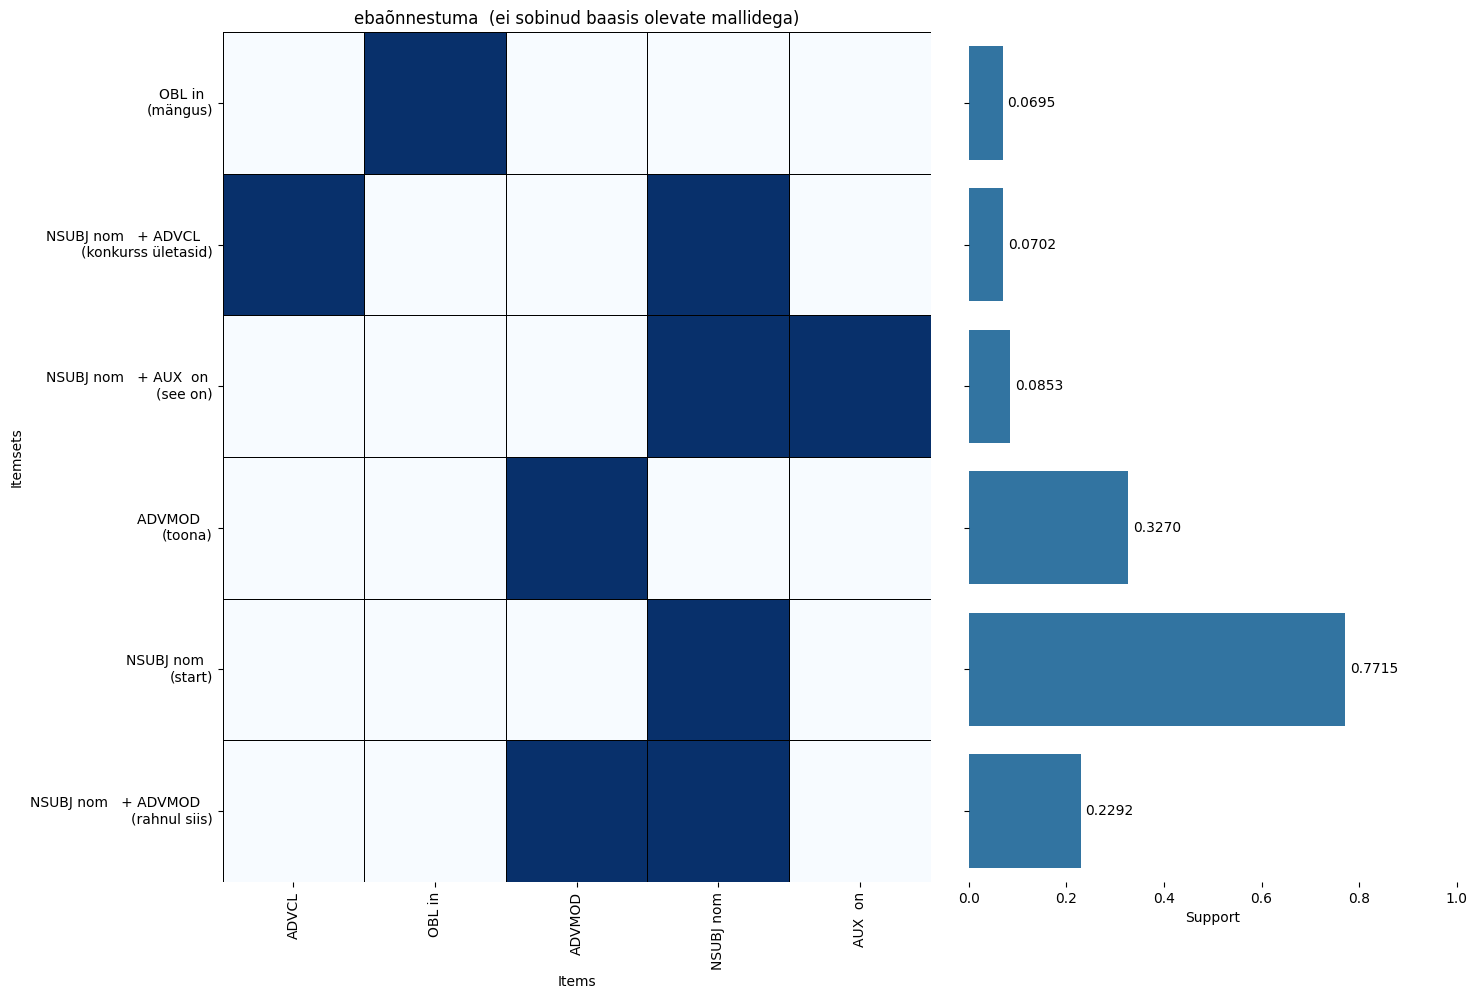

 70%|███████   | 7/10 [01:40<00:46, 15.40s/it]



####################################################
			1104		 uhkustama 
{'pat_id': 2092, 'pattern': 'uhkustama millega', 'verb_word': 'uhkustama', 'verb_compound': '', 'phrase_nr': 1, 'phrase_case': 'kom', 'adp': '', 'inf_verb': ''}

Ei sobinud baasis esinevate mallidega: 275 transaktsiooni.


 70%|███████   | 7/10 [01:45<00:45, 15.12s/it]


KeyboardInterrupt: 

In [30]:
%%time
import random
from sqlalchemy import text, select
v33 = V33(
    PATH_TRANSACTIONS_DB,
    form_treshold_percent = 20,
    form_treshold_count = 5,
    apriori_min_support=0.05,
    apriori_treshold_delta = 0.03,
    apriori_treshold_percent=50,
    datarows_treshold=100000
    )


# 10 juhuslikku
random_i = random.sample(range(0, len(verbs)-1), 10)

# 679 - näima
for i in tqdm(random_i):
#for i in [679]:
    v = verbs[i]
    print()
    print()
    print('####################################################')
    print()
    print()
    print(f"{i} VERB: {v['verb_word']} {v['verb_compound']}")
    print()
    print()
    
    ## leiame iga verbi kohta vajalikud transaktsioonide id-d
    # antud verbi mallidega sobitunud transaktsioonid

    # ilmselt saab seda teha ühe sql päringuga
    verb_all_transactions = cur.execute(
        "SELECT head_id FROM verb_matches where pat_id IN (%s) " % ','.join( [str(id) for id in v['pat_ids'] ]) 
        ).fetchall()


    verb_all_transactions = list(set([vmt['head_id'] for vmt in verb_all_transactions]))

    verb_matched_transactions = cur.execute(
        "SELECT head_id FROM verb_phrase_matches where pat_id IN (%s) " % ','.join( [str(id) for id in v['pat_ids'] ]) 
        ).fetchall()

    verb_matched_transactions = list(set([vmt['head_id'] for vmt in verb_matched_transactions]))
    # transaktsioonid, mis ei sobinud malliga

    unmatched_transactions = [id for id in verb_all_transactions if id not in verb_matched_transactions]
    
    
    patterns = cur.execute(
        "SELECT * FROM patterns where pat_id IN (%s) " % ','.join( [str(id) for id in v['pat_ids'] ]) 
        ).fetchall()
    for p in patterns:
        print(p)

    print()
    if not len(unmatched_transactions):
        print('Ei leitud transaktsioone, mis ei esineks teadaolevates mallides.')
        continue
    print(f'Ei sobinud baasis esinevate mallidega: {len(unmatched_transactions)} transaktsiooni.')
        
    
    transactions = v33.get_transactions_by_head_ids(head_ids=unmatched_transactions)
    
    if len(unmatched_transactions) != len(transactions):
        print(f'{len(unmatched_transactions)} !=  {len(transactions)} tähendab, et osa transaktsioone on tühjad.')
        # print([id for id in unmatched_transactions if id not in transactions])
    
    
    unfiltered = v33.apriori(transactions)
    
    filtered = v33.filter_apriori_results(unfiltered, verbose=True)
    
    
    v33.draw_heatmap(title=f"{v['verb_word']} {v['verb_compound']} (ei sobinud baasis olevate mallidega)", df=filtered)
    
    
    
    

In [25]:
con.close()